In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('Heart.csv')

In [3]:
df.head() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Attribute Information:

        age
        sex
        chest pain type (4 values)
        resting blood pressure
        serum cholestoral in mg/dl
        fasting blood sugar > 120 mg/dl
        resting electrocardiographic results (values 0,1,2)
        maximum heart rate achieved
        exercise induced angina
        oldpeak = ST depression induced by exercise relative to rest
        the slope of the peak exercise ST segment
        number of major vessels (0-3) colored by flourosopy
        thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [4]:
len(df)

303

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.shape

(303, 14)

# Exploratory Data Analysis (EDA) 

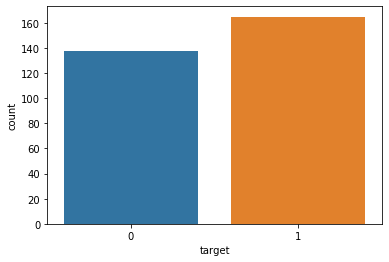

In [8]:
sns.countplot(x='target', data=df);

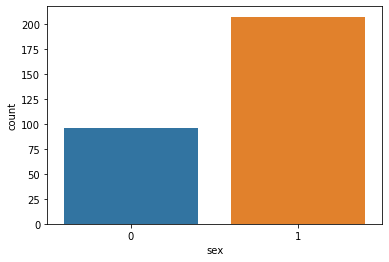

In [9]:
sns.countplot(x='sex', data=df);

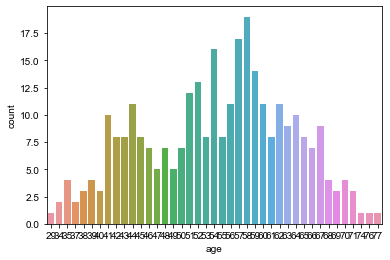

In [10]:
sns.countplot(x='age', data=df);
sns.set(rc={'figure.figsize':(8,8)})

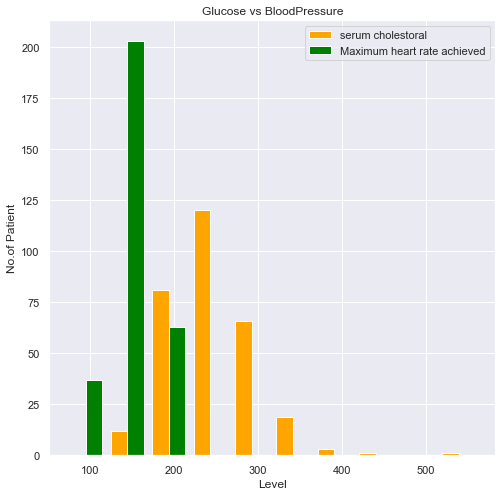

In [13]:
h1 = df['chol']
h2 = df['thalach']
legend = ['serum cholestoral', 'Maximum heart rate achieved']
plt.hist([h1, h2], color=['orange', 'green'])
plt.xlabel("Level")
plt.ylabel("No.of Patient")
plt.legend(legend)
#plt.xticks(range(0, 3))
#plt.yticks(range(1, 2))
plt.title('Glucose vs BloodPressure')
plt.show()

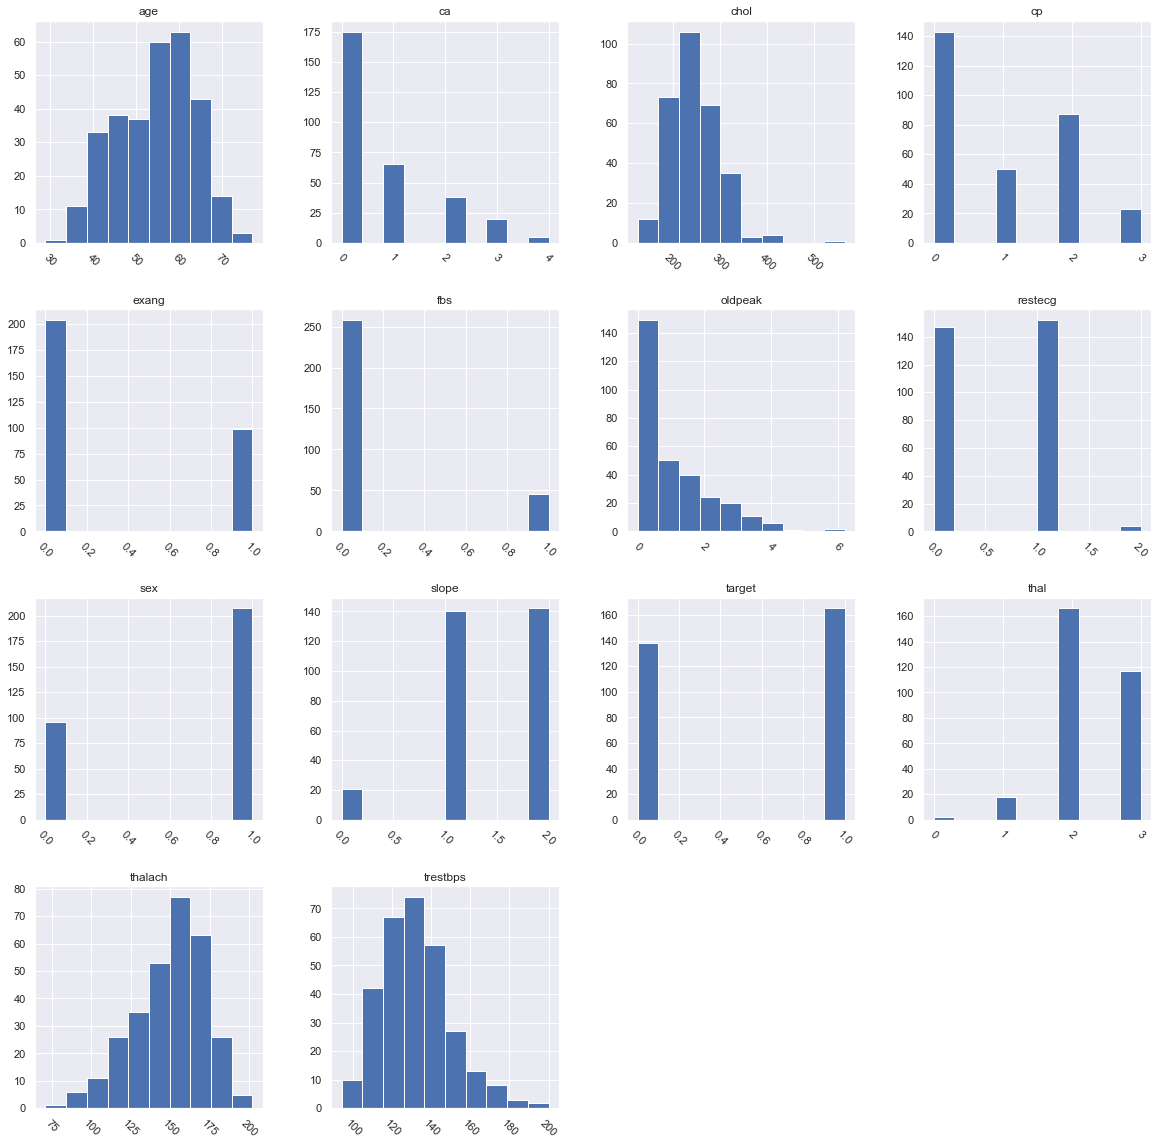

In [14]:
# Plot histogram grid
df.hist(figsize=(20,20), xrot=-45, bins=10) ## Display the labels rotated by 45 degress

# Clear the text "residue"
plt.show()

[Text(0.5, 0, 'age'),
 Text(1.5, 0, 'sex'),
 Text(2.5, 0, 'cp'),
 Text(3.5, 0, 'trestbps'),
 Text(4.5, 0, 'chol'),
 Text(5.5, 0, 'fbs'),
 Text(6.5, 0, 'restecg'),
 Text(7.5, 0, 'thalach'),
 Text(8.5, 0, 'exang'),
 Text(9.5, 0, 'oldpeak'),
 Text(10.5, 0, 'slope'),
 Text(11.5, 0, 'ca'),
 Text(12.5, 0, 'thal'),
 Text(13.5, 0, 'target')]

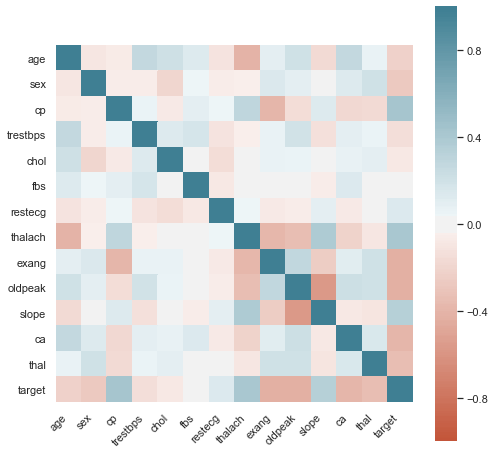

In [16]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x=df.iloc[:,df.columns!='target']
y=df.iloc[:,df.columns=='target']

C:\Users\ML\Anaconda3\envs\New\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ML\Anaconda3\envs\New\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


[0.05931352 0.05376463 0.11277044 0.07208982 0.05687853 0.01593145
 0.03160385 0.08774671 0.12830524 0.09193924 0.04744866 0.15726737
 0.08494055]


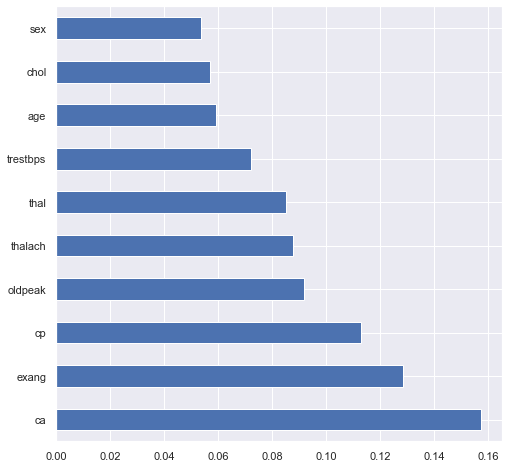

In [21]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [27]:
X = df[['ca','exang','cp']]
X.head()

,ca,exang,cp
0,0,0,3
1,0,0,2
2,0,0,1
3,0,0,1
4,0,1,0


In [19]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [20]:
y.head()

,target
0,1
1,1
2,1
3,1
4,1


In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [22]:
x_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
74,43,0,2,122,213,0,1,165,0,0.2,1,0,2
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2
64,58,1,2,140,211,1,0,165,0,0.0,2,0,2
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2


In [23]:
y_train.head()

,target
74,1
153,1
64,1
296,0
287,0


In [24]:
print(df.shape)
print(x_train.shape)
print(x_test.shape)

(303, 14)
(242, 13)
(61, 13)


# Model1

In [25]:
from sklearn.naive_bayes import GaussianNB

In [26]:
model1 = GaussianNB() 
model1.fit(x_train, y_train) 

C:\Users\ML\Anaconda3\envs\New\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [27]:
y_pred = model1.predict(x_test) 

In [28]:
y_pred

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [29]:
from sklearn import metrics

In [30]:
acc1=metrics.accuracy_score(y_test,y_pred)
print(acc1)

0.8524590163934426


In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
cnf_matrix = confusion_matrix(y_test,y_pred)

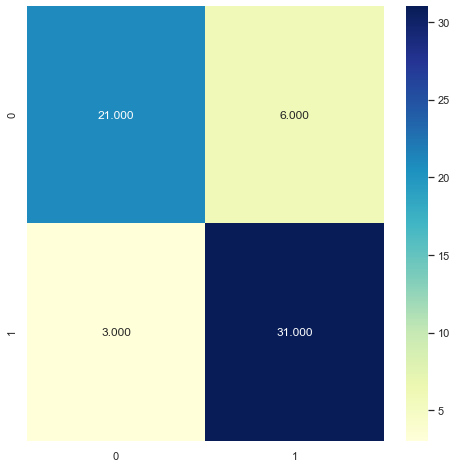

In [33]:
labels = [0,1]
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.show()

# Model2

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
model2=RandomForestClassifier(n_estimators=100)
model2.fit(x_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
y_pred = model2.predict(x_test) 
y_pred

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [37]:
acc2=metrics.accuracy_score(y_test,y_pred)
print(acc2)

0.8360655737704918


In [38]:
cnf_matrix = confusion_matrix(y_test,y_pred)

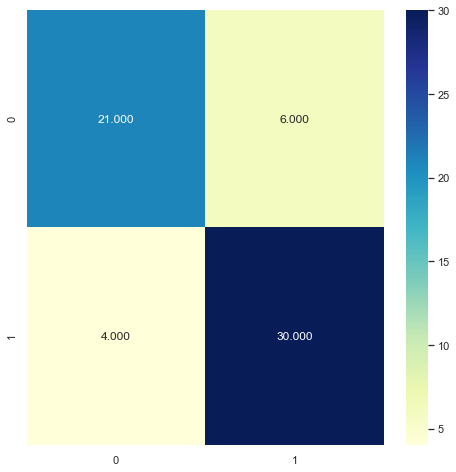

In [39]:
labels = [0,1]
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.show()

# Model3

In [40]:
from sklearn.tree import DecisionTreeClassifier 

In [41]:
model3=DecisionTreeClassifier()


In [42]:
model3.fit(x_train, y_train) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [43]:
y_pred = model3.predict(x_test) 

In [44]:
acc3=metrics.accuracy_score(y_test,y_pred)
print(acc3)

0.8032786885245902


In [45]:
cnf_matrix = confusion_matrix(y_test,y_pred)

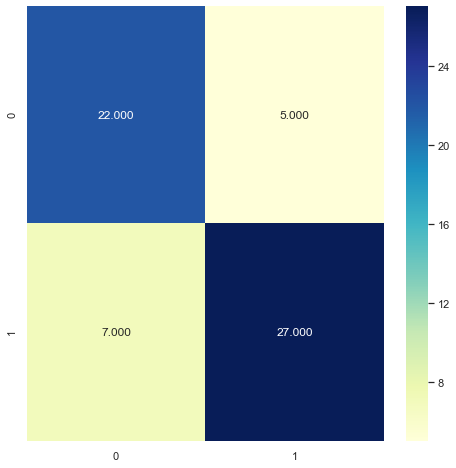

In [46]:
labels = [0,1]
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.show()

# Model4

In [47]:
from sklearn import svm

In [48]:
model4 = svm.SVC()

In [49]:
model4.fit(x_train, y_train) 

C:\Users\ML\Anaconda3\envs\New\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ML\Anaconda3\envs\New\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [50]:
y_pred = model4.predict(x_test) 

In [51]:
acc4=metrics.accuracy_score(y_test,y_pred)
print(acc4)

0.5901639344262295


In [52]:
cnf_matrix = confusion_matrix(y_test,y_pred)

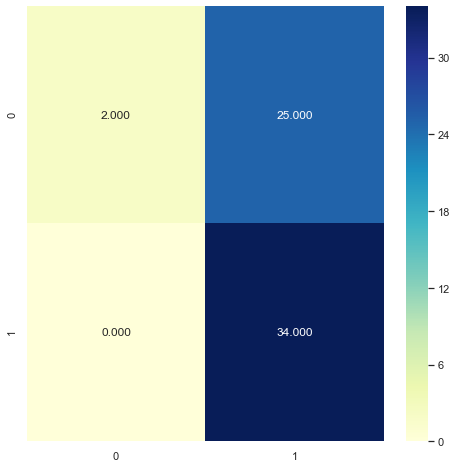

In [53]:
labels = [0,1]
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.show()

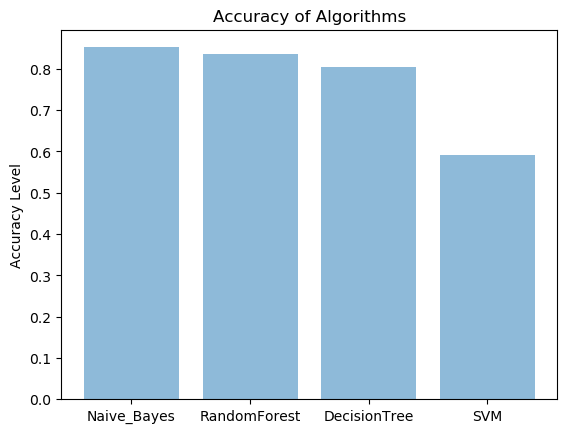

In [54]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('Naive_Bayes','RandomForest','DecisionTree','SVM')
y_pos = np.arange(len(objects))
performance = [acc1,acc2,acc3,acc4]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy Level')
plt.title('Accuracy of Algorithms')
 
plt.show()

In [55]:
import pickle 
with open('heart.pickle','wb') as f:
    pickle.dump(acc1,f)